# **Importing library**

In [ ]:
#importing library for computation
import numpy as np
import pandas as pd

# **Loading dataset**

In [ ]:
# loading dataset
data=pd.read_csv("D:/healthcare-dataset-stroke-data.xls")
data.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
# describing data
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#checking for data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# **Preprocessing**

In [ ]:
# in our model no need of id so dropping id from dataset
data=data.drop('id',axis=1)


In [ ]:
# replacing string value with no. in data
data=data.replace({
    'Yes':1,
    'No':0
})

In [ ]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
data=data.replace({
    'Private':4, 'Self-employed':1, 'Govt_job':2, 'children':0, 'Never_worked':3
})

In [ ]:
data=data.replace({
    'Urban':1, 'Rural':0
})

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,4,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,1,1,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,1,4,0,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,4,1,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,4,1,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,1,1,1,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,1,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,4,0,166.29,25.6,formerly smoked,0


In [ ]:
data=data.replace({
    'Male':2,'Female':1,'Other':0
})

In [ ]:
data['smoking_status'].unique()


array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
data['gender'].unique()

array([2, 1, 0], dtype=int64)

In [ ]:
# dropping nan values from dataset
data=data.replace({
    'Unknown':np.NaN
})

In [ ]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data=data.replace({
    'formerly smoked':1, 'never smoked':0, 'smokes':2
})

In [ ]:
#its seen that some coloumns are not needed to make our model so dropping those coloumn

In [ ]:
data.pop("gender")

0       2
2       2
3       1
4       1
5       2
       ..
5100    2
5102    1
5106    1
5107    1
5108    2
Name: gender, Length: 3426, dtype: int64

In [ ]:
data.pop("Residence_type")

0       1
2       0
3       1
4       0
5       1
       ..
5100    0
5102    0
5106    1
5107    0
5108    0
Name: Residence_type, Length: 3426, dtype: int64

In [ ]:
data.pop('ever_married')

0       1
2       1
3       1
4       1
5       1
       ..
5100    1
5102    1
5106    1
5107    1
5108    1
Name: ever_married, Length: 3426, dtype: int64

In [ ]:
data.pop('work_type')

0       4
2       4
3       4
4       1
5       4
       ..
5100    1
5102    4
5106    1
5107    1
5108    4
Name: work_type, Length: 3426, dtype: int64

In [ ]:
data.pop('smoking_status')

0       1
2       0
3       2
4       0
5       1
       ..
5100    0
5102    0
5106    0
5107    0
5108    1
Name: smoking_status, Length: 3426, dtype: int64

# **Importing library for Machine learnig model**

In [ ]:
#importing library which can be use for model
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# extracting label and features in y and x
x=data.iloc[:,0:10]
y=data.iloc[:,-1]


In [ ]:
# splitting data into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.1)

In [ ]:
#libraray for tuning our data
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score


# **Tunning data**

In [ ]:
# function for tuning
def tunning_decision_tree(x,y):
    dt_clf=DecisionTreeClassifier(random_state=5)
    scorer=make_scorer(roc_auc_score)
    parameters={"criterion":['gini', 'entropy'],'splitter':['best','random'],'max_depth':range(1,8),'min_samples_split':range(2,4),'min_samples_leaf':[0.1,0.2,0.3,0.4,0.5]
               ,"max_features":['auto', 'sqrt', 'log2'],'max_leaf_nodes':range(2,5)}
    obj=GridSearchCV(dt_clf,parameters,scoring=scorer,cv=shuffle())
    obj=obj.fit(x,y)
    best_clf=obj.best_estimator_
    print(best_clf)
    return best_clf
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def tunning_tree(x,y):
    dt_clf=RandomForestClassifier()
    scorer=make_scorer(roc_auc_score)
    parameters={'n_estimators':[10,20,30,40,50,60,70,80,90,100],'criterion':['gini','entropy']}
    obj=GridSearchCV(dt_clf,parameters,scoring=scorer,cv=shuffle())
    obj=obj.fit(x,y)
    best_clf=obj.best_estimator_
    print(best_clf)
    return best_clf

In [ ]:
# shuffling our data for cross-validation data
from sklearn.model_selection import ShuffleSplit
def shuffle(n_split=10,test_siz=0.2,random_stat=5):
    sset=ShuffleSplit(n_splits=n_split,test_size=test_siz,random_state=random_stat)
    return sset

# **Evaluating model**

In [ ]:
# evaluating our model
from sklearn.model_selection import learning_curve
def learning_graph(estimator,x,y):
    train_size,train_score,test_score=learning_curve(estimator,x,y,cv=shuffle(),train_sizes=np.linspace(0.1,1.0,10))
    train_scores_mean=np.mean(train_score,axis=1)
    test_scores_mean=np.mean(test_score,axis=0)
    plt.grid()
    plt.plot(train_scores_mean,'o-',color='g')
    plt.plot(test_scores_mean,'o-',color='r')
    plt.show()

In [ ]:
clf =tunning_tree(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


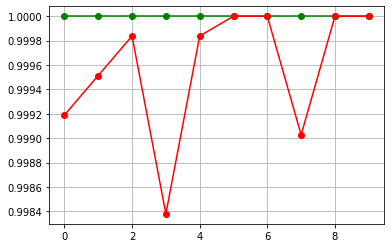

In [ ]:
learning_graph(clf,xtrain,ytrain)

In [ ]:
pred=clf.predict(xtest)

In [ ]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(ytest,pred)
auc

1.0

In [ ]:
from sklearn.metrics import roc_curve
def roc_c(ytest,prediction):
    fpr,tpr,threshold=roc_curve(ytest,prediction)
    plt.grid()
    plt.plot(fpr,tpr)
    plt.legend("roc curve")
    plt.show()
    
    

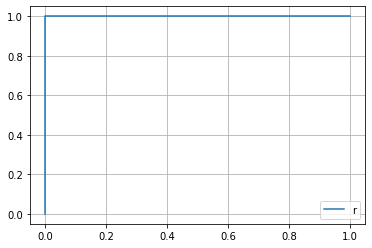

In [ ]:
roc_c(ytest,pred)

In [ ]:
fpr,tpr,threshold=roc_curve(ytest,pred)
print(fpr,tpr,threshold)

[0. 0. 1.] [0. 1. 1.] [2 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,pred))

[[329   0]
 [  0  14]]


In [ ]:
import pickle


In [ ]:
#dumping model

In [ ]:
Pkl_Filename = "brain_stokes_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)

In [ ]:
#loading model

In [ ]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)